# HW3 Support Vector Machine and Decision Trees Karanvir Singh

# Due on 4/27 23:59 pm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## We will use the same affair dataset from HW2, but will skip the EDA phrase we have done enough of it

#### Everything removing outliers, create dummies variabes had been done for you

In [2]:
# Remember the affair data set from HW3, we will use that dataset again
# but we will directly load it from the API
orig_df = pd.read_csv("affairs2.csv")
# Set up our target class label
orig_df['had_affair'] = orig_df['affairs'].apply(lambda x: 1 if x != 0 else 0)
orig_df = orig_df.drop('affairs',axis=1)
# remove NA
orig_df.dropna(inplace=True)
# create dummies variable for occupation
occ = pd.get_dummies(orig_df['occupation'],drop_first=True)
# we include rate_marriage feature as well. In HW3, we did not include that variable
features = ['rate_marriage','age','yrs_married','children','religious','educ', 'had_affair']
df = orig_df
df = pd.concat([orig_df[features], occ], axis=1)
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,had_affair,occ2,occ3,occ4,occ5,occ6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,1,0,0,0,0
1,3.0,27.0,13.0,3.0,1.0,14.0,1,0,1,0,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1,0,1,0,0,0
3,4.0,37.0,16.5,4.0,3.0,16.0,1,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,1,0,1,0,0,0


In [3]:
# make sure there is no missing values
df.isnull().sum()

rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
had_affair       0
occ2             0
occ3             0
occ4             0
occ5             0
occ6             0
dtype: int64

### Now we are ready to build models

### Question 1: Build a classification model using SVC using linear kernel with usual steps

Type your code here

In [4]:
#import the model from sklearn import svm, create the SVC object 
#model = svm.SVC()
#Call Train test split
#print out model performance

In [5]:
from sklearn import svm
model = svm.SVC(kernel='linear')

In [6]:
from sklearn.model_selection import train_test_split
target = df['had_affair']
x_train, x_test, y_train, y_test = train_test_split(df.drop('had_affair', axis = 1), 
                                                    df['had_affair'], train_size=0.80, 
                                                    random_state=101)

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
educ_children= df[['educ','children']].as_matrix
model.fit(x_train, y_train)

#print out classificaion report
predictions = model.predict(x_test)
print("Confusion Matrix: ")
print(confusion_matrix(y_test, predictions))
print('\nClassification Report:')
print(classification_report(y_test, predictions))
print('Accuracy Score: ')
print(accuracy_score(y_test, predictions))

Confusion Matrix: 
[[787  63]
 [310 114]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       850
           1       0.64      0.27      0.38       424

    accuracy                           0.71      1274
   macro avg       0.68      0.60      0.59      1274
weighted avg       0.69      0.71      0.67      1274

Accuracy Score: 
0.707221350078493


### Question 2. Now try different value of C-parameter and rerun your model

In [8]:
# Try C = 2**-5 and 2**5

In [9]:
model = svm.SVC(kernel = 'linear', C=2**5)
model.fit(x_train, y_train)
print (model)

#classification report
predictions = model.predict(x_test)
print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, predictions))
print('\nClassification Report:')
print(classification_report(y_test, predictions))
print('Accuracy Score: ')
print(accuracy_score(y_test, predictions))

SVC(C=32, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Confusion Matrix: 
[[786  64]
 [311 113]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.92      0.81       850
           1       0.64      0.27      0.38       424

    accuracy                           0.71      1274
   macro avg       0.68      0.60      0.59      1274
weighted avg       0.69      0.71      0.66      1274

Accuracy Score: 
0.7056514913657771


In [10]:
model = svm.SVC(kernel='linear', C=2**-5)
model.fit(x_train, y_train)
print(model)

#classiciation report
predictions = model.predict(x_test)
print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, predictions))
print('\nClassification Report:')
print(classification_report(y_test, predictions))
print('Accuracy Score: ')
print(accuracy_score(y_test,predictions))

SVC(C=0.03125, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Confusion Matrix: 
[[791  59]
 [317 107]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.93      0.81       850
           1       0.64      0.25      0.36       424

    accuracy                           0.70      1274
   macro avg       0.68      0.59      0.59      1274
weighted avg       0.69      0.70      0.66      1274

Accuracy Score: 
0.7048665620094191


### Question 3. Try using rbf as your kernel and use Gamma of 2**-5, 0.1, 1 and 2

In [11]:
model = svm.SVC(kernel='rbf', C=1, gamma=2**-5)
model.fit(x_train, y_train)
print(model)

#classification report
predictions = model.predict(x_test)
print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, predictions))
print('\nClassification Report:')
print(classification_report(y_test, predictions))
print('Accuracy Score:')
print(accuracy_score(y_test, predictions))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.03125, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Confusion Matrix: 
[[775  75]
 [293 131]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.91      0.81       850
           1       0.64      0.31      0.42       424

    accuracy                           0.71      1274
   macro avg       0.68      0.61      0.61      1274
weighted avg       0.70      0.71      0.68      1274

Accuracy Score:
0.7111459968602826


In [12]:
model = svm.SVC(kernel='rbf', C=1, gamma=2**-5)
model.fit(x_train, y_train)
print(model)

#classification report
predictions = model.predict(x_test)
print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, predictions))
print('\nClassification Report:')
print(classification_report(y_test, predictions))
print('Accuracy Score:')
print(accuracy_score(y_test, predictions))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.03125, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Confusion Matrix: 
[[775  75]
 [293 131]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.91      0.81       850
           1       0.64      0.31      0.42       424

    accuracy                           0.71      1274
   macro avg       0.68      0.61      0.61      1274
weighted avg       0.70      0.71      0.68      1274

Accuracy Score:
0.7111459968602826


In [13]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(x_train, y_train)
print(model)

#classification report
predictions = model.predict(x_test)
print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, predictions))
print('\nClassification Report:')
print(classification_report(y_test, predictions))
print('Accuracy Score:')
print(accuracy_score(y_test, predictions))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Confusion Matrix: 
[[759  91]
 [291 133]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.89      0.80       850
           1       0.59      0.31      0.41       424

    accuracy                           0.70      1274
   macro avg       0.66      0.60      0.60      1274
weighted avg       0.68      0.70      0.67      1274

Accuracy Score:
0.7001569858712716


In [14]:
model = svm.SVC(kernel='rbf', C=1, gamma=1)
model.fit(x_train, y_train)
print(model)

#classification report
predictions = model.predict(x_test)
print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, predictions))
print('\nClassification Report:')
print(classification_report(y_test, predictions))
print('Accuracy Score:')
print(accuracy_score(y_test, predictions))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

Confusion Matrix: 
[[736 114]
 [322 102]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.87      0.77       850
           1       0.47      0.24      0.32       424

    accuracy                           0.66      1274
   macro avg       0.58      0.55      0.55      1274
weighted avg       0.62      0.66      0.62      1274

Accuracy Score:
0.6577708006279435


In [15]:
model = svm.SVC(kernel='rbf', C=1, gamma=2)
model.fit(x_train, y_train)
print(model)

#classification report
predictions = model.predict(x_test)
print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, predictions))
print('\nClassification Report:')
print(classification_report(y_test, predictions))
print('Accuracy Score:')
print(accuracy_score(y_test, predictions))

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

Confusion Matrix: 
[[751  99]
 [357  67]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.88      0.77       850
           1       0.40      0.16      0.23       424

    accuracy                           0.64      1274
   macro avg       0.54      0.52      0.50      1274
weighted avg       0.59      0.64      0.59      1274

Accuracy Score:
0.6420722135007849


### Question 4. So out of all the models you try in Question 2 and 3, what is the best choice for the kernel, C and gamma parameters?

The best choice for the rbf was 1 because it gave a better accuracy score. It was a larger number as opposed to the rest in general and gave a better score for both the rbf and linear. This allows room for some missclassification. The gamma parameters that gave good accuracy scores were the ones that were close to 0. Although this may sounds great, this means that our model is underfitting.

The linear model with 2** 5 = 32 gave a good accuracy score with a lt less misclassification. Although we are also overfitting the model. Both accuracy scores were close to each other, so any of these options will be a great choice as long as you have the right parameters. 

# Now we will try to fit the same dataset with Decision Trees

### Question 5. Build a Decision Tree Classifier using default parameter

In [16]:
x = df.drop('had_affair', axis = 1)
y = df['had_affair']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [17]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predictions = model.predict(x_test)
print('Confusion Matrix: ')
print(confusion_matrix(y_test,predictions))
print('\nClassification Report:')
print(classification_report(y_test,predictions))
print('Accuracy Score: ')
print(accuracy_score(y_test,predictions))

Confusion Matrix: 
[[1050  266]
 [ 381  213]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.80      0.76      1316
           1       0.44      0.36      0.40       594

    accuracy                           0.66      1910
   macro avg       0.59      0.58      0.58      1910
weighted avg       0.64      0.66      0.65      1910

Accuracy Score: 
0.6612565445026178


### Question 6. Now try using max_depth = 2, 3, 4 and crierion = 'gini' and 'entropy' to build 3 X 2 = 6 different models

In [19]:
#gini - 2
model = DecisionTreeClassifier(max_depth=2, criterion='gini')
model.fit(x_train,y_train)

#for classification data
predictions = model.predict(x_test)
print('Confusion Matrix: ')
print(confusion_matrix(y_test, predictions))
print('\nClassification Report:')
print(classification_report(y_test,predictions))
print('Accuracy Score: ')
print(accuracy_score(y_test,predictions))

Confusion Matrix: 
[[1189  127]
 [ 406  188]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82      1316
           1       0.60      0.32      0.41       594

    accuracy                           0.72      1910
   macro avg       0.67      0.61      0.62      1910
weighted avg       0.70      0.72      0.69      1910

Accuracy Score: 
0.7209424083769633


In [20]:
#entropy -2 
model = DecisionTreeClassifier(max_depth=2, criterion='entropy')
model.fit(x_train,y_train)

#for classification data
predictions = model.predict(x_test)
print('Confusion Matrix: ')
print(confusion_matrix(y_test, predictions))
print('\nClassification Report:')
print(classification_report(y_test,predictions))
print('Accuracy Score: ')
print(accuracy_score(y_test,predictions))

Confusion Matrix: 
[[1189  127]
 [ 406  188]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82      1316
           1       0.60      0.32      0.41       594

    accuracy                           0.72      1910
   macro avg       0.67      0.61      0.62      1910
weighted avg       0.70      0.72      0.69      1910

Accuracy Score: 
0.7209424083769633


In [21]:
#gini - 3
model = DecisionTreeClassifier(max_depth=3, criterion='gini')
model.fit(x_train,y_train)

#for classification data
predictions = model.predict(x_test)
print('Confusion Matrix: ')
print(confusion_matrix(y_test, predictions))
print('\nClassification Report:')
print(classification_report(y_test,predictions))
print('Accuracy Score: ')
print(accuracy_score(y_test,predictions))

Confusion Matrix: 
[[1213  103]
 [ 434  160]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.92      0.82      1316
           1       0.61      0.27      0.37       594

    accuracy                           0.72      1910
   macro avg       0.67      0.60      0.60      1910
weighted avg       0.70      0.72      0.68      1910

Accuracy Score: 
0.7188481675392671


In [22]:
#entropy - 3
model = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model.fit(x_train,y_train)

#for classification data
predictions = model.predict(x_test)
print('Confusion Matrix: ')
print(confusion_matrix(y_test, predictions))
print('\nClassification Report:')
print(classification_report(y_test,predictions))
print('Accuracy Score: ')
print(accuracy_score(y_test,predictions))

Confusion Matrix: 
[[1213  103]
 [ 434  160]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.92      0.82      1316
           1       0.61      0.27      0.37       594

    accuracy                           0.72      1910
   macro avg       0.67      0.60      0.60      1910
weighted avg       0.70      0.72      0.68      1910

Accuracy Score: 
0.7188481675392671


In [23]:
#gini - 4
model = DecisionTreeClassifier(max_depth=4, criterion='gini')
model.fit(x_train,y_train)

#for classification data
predictions = model.predict(x_test)
print('Confusion Matrix: ')
print(confusion_matrix(y_test, predictions))
print('\nClassification Report:')
print(classification_report(y_test,predictions))
print('Accuracy Score: ')
print(accuracy_score(y_test,predictions))

Confusion Matrix: 
[[1147  169]
 [ 378  216]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.87      0.81      1316
           1       0.56      0.36      0.44       594

    accuracy                           0.71      1910
   macro avg       0.66      0.62      0.62      1910
weighted avg       0.69      0.71      0.69      1910

Accuracy Score: 
0.7136125654450262


In [24]:
#entropy - 4
model = DecisionTreeClassifier(max_depth=4, criterion='entropy')
model.fit(x_train,y_train)

#for classification data
predictions = model.predict(x_test)
print('Confusion Matrix: ')
print(confusion_matrix(y_test, predictions))
print('\nClassification Report:')
print(classification_report(y_test,predictions))
print('Accuracy Score: ')
print(accuracy_score(y_test,predictions))

Confusion Matrix: 
[[1147  169]
 [ 378  216]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.87      0.81      1316
           1       0.56      0.36      0.44       594

    accuracy                           0.71      1910
   macro avg       0.66      0.62      0.62      1910
weighted avg       0.69      0.71      0.69      1910

Accuracy Score: 
0.7136125654450262


### Question 7. What is your obsevation from Question 6? Does the choice of the criterion important in this case? What about the max_depth? What is the best choice of max_depth and criterion?

Answer:I can observe that both gini and entropy end up giving similar results all around the same range. The different max_depth and criterion resulted with the same accuracy scores for the most part, so I do think believe that choice of criterion is important in this case. The best choice for max_depth and criterion is 4 because the gini and entropy end up being the same value.  

## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [25]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import io
import pydot 

features = list(df.columns[1:])
features

C:\Users\ksin3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


['age',
 'yrs_married',
 'children',
 'religious',
 'educ',
 'had_affair',
 'occ2',
 'occ3',
 'occ4',
 'occ5',
 'occ6']

                                                     Tree Visualization                   


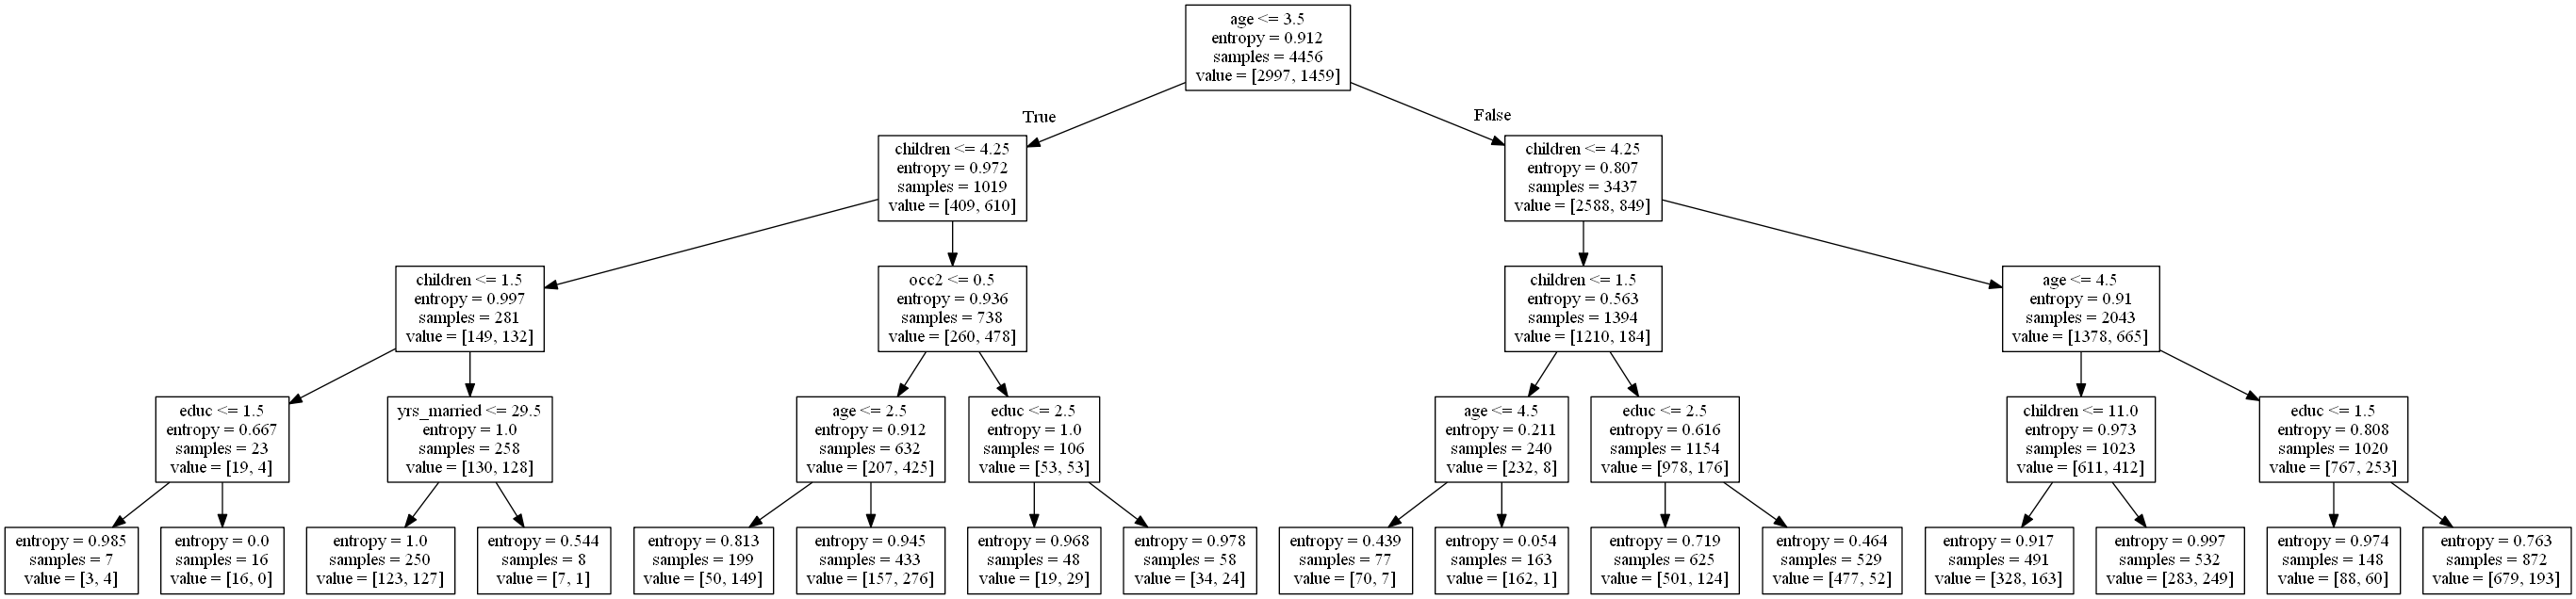

In [26]:
#type your code here
print('                                                     Tree Visualization                   ')
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=features)
(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


### Question 8, now pick three models, with max_depth = 2, 3 and 4. You can pick the which ever criterions you want and visual the three trees

In [27]:
#imported pydot using conda install -c install anaconda pydot

In [28]:
# Hint 
# model1 = DecisionTreeClassifier(max_depth=..., criterion= ...)
# model1.fit(X_train, y_train)
# model2 = DecisionTreeClassifier(max_depth=..., criterion= ...)
# model2.fit(X_train, y_train)
# model3 = DecisionTreeClassifier(max_depth=..., criterion= ...)
# model3.fit(X_train, y_train)
# Then display all 3 trees

         Gini Tree Visualization                                 Max Depth = 2


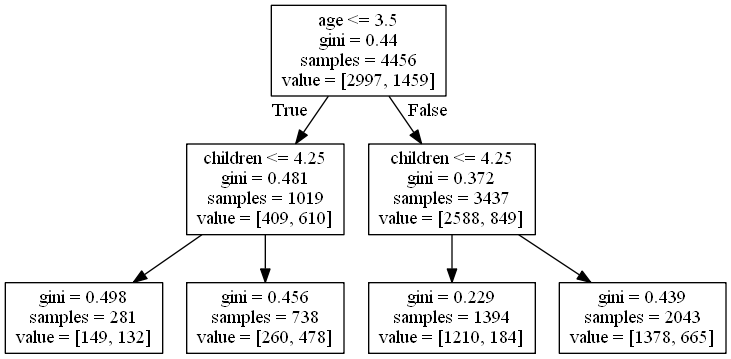

In [38]:
#Gini 2
print('         Gini Tree Visualization                                 Max Depth = 2')
model1 = DecisionTreeClassifier(max_depth = 2, criterion = 'gini')
model1.fit(x_train, y_train)

dot_data = StringIO()
export_graphviz(model1, out_file=dot_data, feature_names=features)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())


         Gini Tree Visualization                                                Max Depth = 3


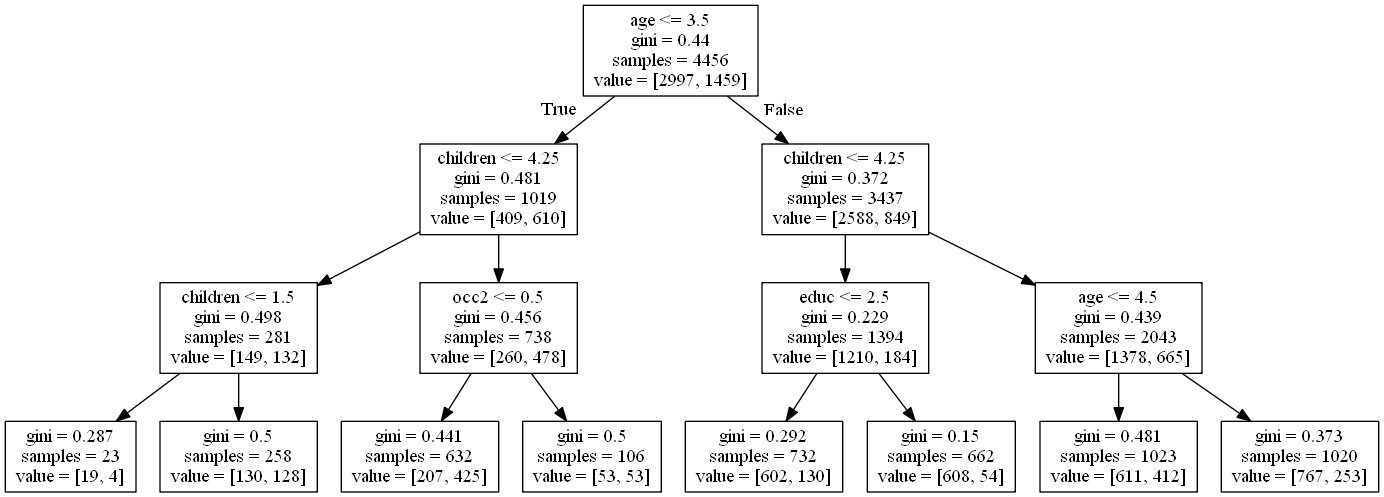

In [39]:
#Gini 3
print('         Gini Tree Visualization                                                Max Depth = 3')
model2 = DecisionTreeClassifier(max_depth = 3, criterion = 'gini')
model2.fit(x_train, y_train)

dot_data = StringIO()
export_graphviz(model2, out_file=dot_data, feature_names=features)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

         Gini Tree Visualization                                             Max Depth = 4


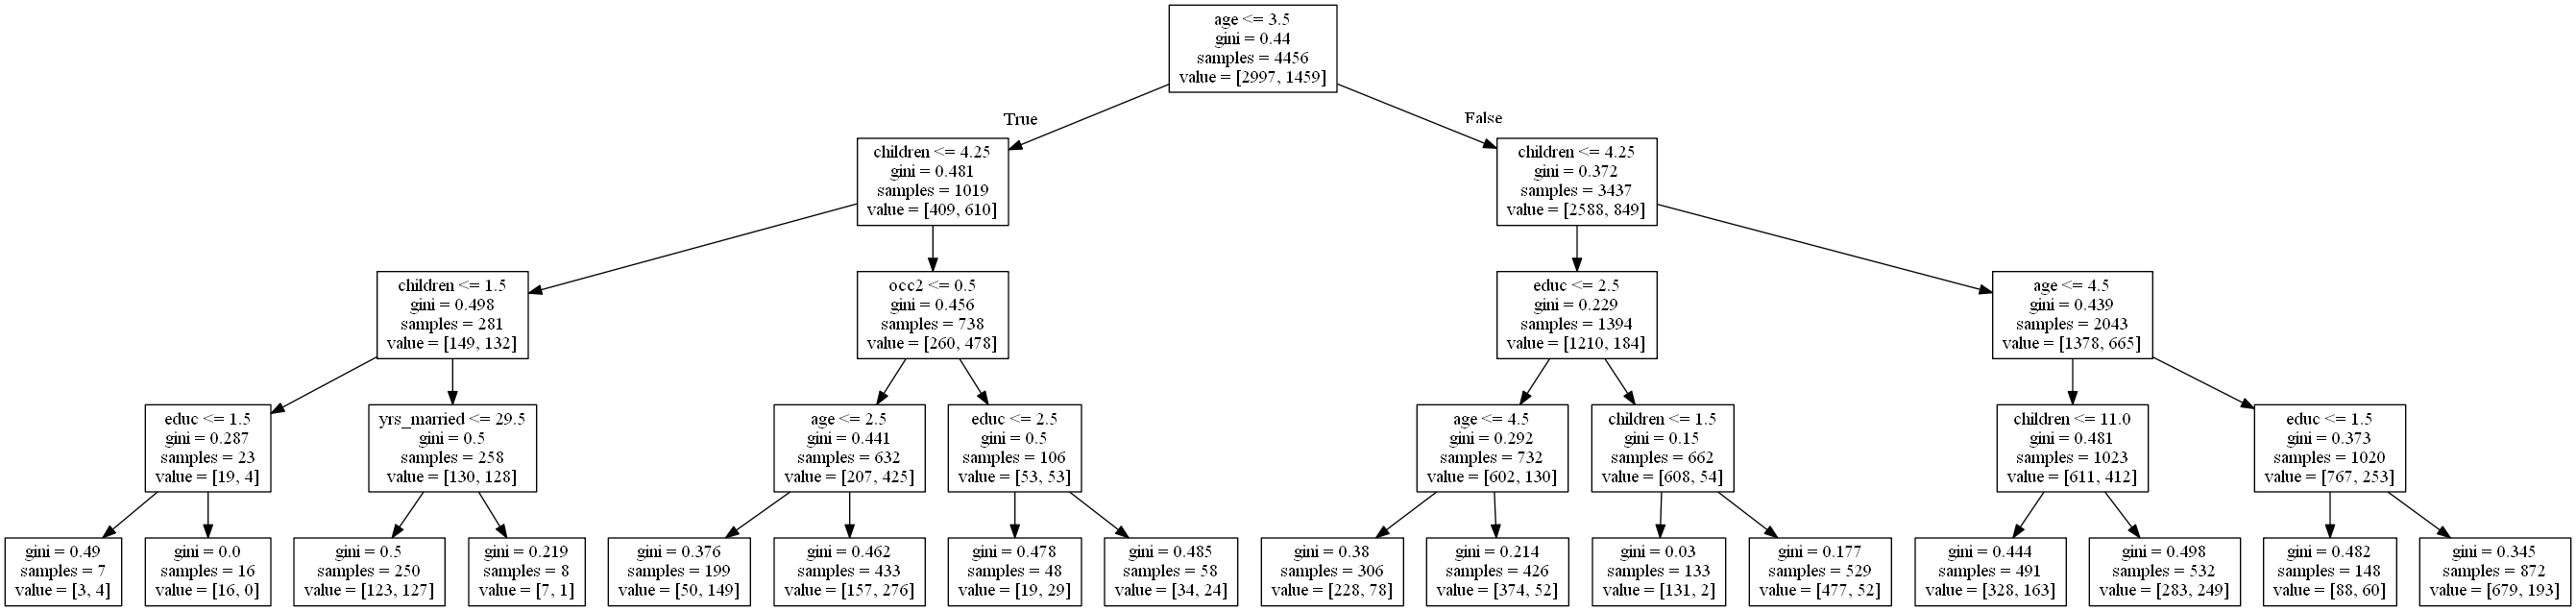

In [40]:
#Gini 4
print('         Gini Tree Visualization                                             Max Depth = 4')

model3 = DecisionTreeClassifier(max_depth = 4, criterion = 'gini')
model3.fit(x_train, y_train)

dot_data = StringIO()
export_graphviz(model3, out_file=dot_data, feature_names=features)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

### Question 9. Now build a Random Forest Classifier with, say, 100 trees. Check the model performance 

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
rfc_pred = rfc.predict(x_test)
#model performance and classification data
print('Confusion Matrix: ')
print(confusion_matrix(y_test, predictions))
print('\nClassification Report:')
print(classification_report(y_test,predictions))
print('Accuracy Score: ')
print(round(accuracy_score(y_test,predictions), 2))

Confusion Matrix: 
[[1147  169]
 [ 378  216]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.87      0.81      1316
           1       0.56      0.36      0.44       594

    accuracy                           0.71      1910
   macro avg       0.66      0.62      0.62      1910
weighted avg       0.69      0.71      0.69      1910

Accuracy Score: 
0.71
